**Aviation Data Project Phase 1**

We can analyze make/model by total injuries
We start by cleaning up the column names
look at the shape, info, and .describe()
look for missing values


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in your CSV File
df = pd.read_csv('data/Aviation_Data.csv', encoding='latin-1', low_memory=False)

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [7]:
# Clean column names, replacing . to _ and making them lowercase
df = df.rename(columns={c: c.lower().replace('.', '_') for c in df.columns})

In [8]:
# Convert event_date column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

In [9]:
# Split location column into city and state columns
df[['city', 'state']] = df['location'].str.split(', ', n=1, expand=True)

In [10]:
# Clean city column to make everything but the first letter lowercase
df['city'] = df['city'].str.title()

In [11]:
# Convert airport name column to title format
df['airport_name'] = df['airport_name'].str.title()

In [12]:
df.loc[df['airport_name'] == 'Private Airstrip', 'airport_name'] = 'Private'

In [13]:
# Remove all data with an event_date before 2001-11
df = df[df['event_date'] >= '2001-11']

In [14]:
#Dropping some columns we will not be using
df.drop(['location', 'publication_date', 'longitude', 'latitude', 'schedule',], axis=1, inplace=True)

In [15]:
df = df[df['country'] == 'United States']

In [16]:
# Define a function to clean the injury_severity column
def clean_column(column):
    column = column.str.replace(r'\(\d\)', '')
    return column #Here we are saying if the value in injury severity is like this Fatal(3), we want it to just be fatal

# Apply the function to all relevant columns
df['injury_severity'] = clean_column(df['injury_severity'])

In [17]:
df.state.value_counts()

CA          3116
TX          2493
FL          2388
AK          2073
AZ          1305
            ... 
CO, CO         1
Oahu, HI       1
CB             1
MG, OF         1
NYC, NY        1
Name: state, Length: 67, dtype: int64

In [18]:
#creating a dictionary of states and their corresponding regions
state_region_dict = {'CT': 'North East', 'DE': 'North East', 'ME': 'North East', 'MD': 'North East', 'MA': 'North East', 'NH': 'North East',
                     'NJ': 'North East', 'NY': 'North East', 'PA': 'North East', 'RI': 'North East', 'VT': 'North East',
                     'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MI': 'Midwest', 'MN': 'Midwest',
                     'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',
                     'AL': 'South', 'AR': 'South', 'FL': 'South', 'GA': 'South', 'KY': 'South', 'LA': 'South', 'MS': 'South',
                     'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South',
                     'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West'}

# Add a new column 'region' to the dataframe and map the state to its corresponding region
df['region'] = df['state'].map(state_region_dict)

In [19]:
# Get all unique states in the dataframe
all_states = set(df['state'].unique())

# Get all states in the state_region_dict
region_states = set(state_region_dict.keys())

# Get the difference between the two sets to find states not in the state_region_dict
states_not_in_dict = all_states - region_states

# Print the states not in the state_region_dict
states_not_in_dict

{'AO',
 'CB',
 'CO, CO',
 'DC',
 'GM',
 'GU',
 'LA,',
 'MG, OF',
 'Maui, HI',
 'NYC, NY',
 None,
 'OF',
 'Oahu, HI',
 'PO',
 'PR',
 'San Juan Is., WA',
 'UN',
 'VI',
 nan}

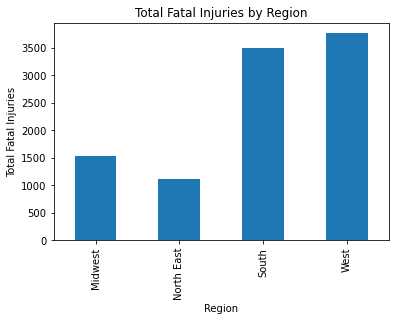

In [20]:
# Group the dataframe by region and sum the total fatal injuries
injuries_by_region = df.groupby('region')['total_fatal_injuries'].sum()

# Create a bar chart of total injuries by region
injuries_by_region.plot(kind='bar')
plt.title('Total Fatal Injuries by Region')
plt.xlabel('Region')
plt.ylabel('Total Fatal Injuries')
plt.show()

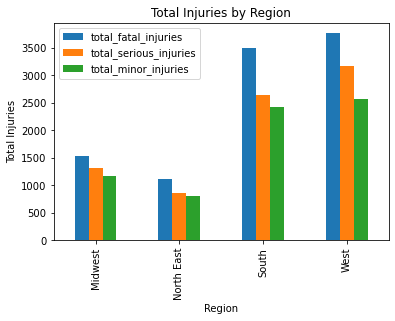

In [21]:
# Group the dataframe by region and sum the total injuries
injuries_by_region = df.groupby('region')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()

# Create a bar chart of total injuries by region
injuries_by_region.plot(kind='bar')
plt.title('Total Injuries by Region')
plt.xlabel('Region')
plt.ylabel('Total Injuries')
plt.show()

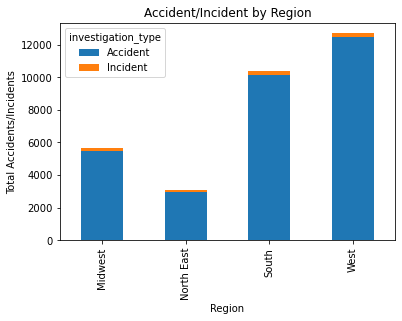

In [22]:
investigation_type_by_region = df.groupby(['region', 'investigation_type'])['investigation_type'].count()

# Create a bar chart of total accidents/incidents by region
investigation_type_by_region.unstack().plot(kind='bar', stacked=True)
plt.title('Accident/Incident by Region')
plt.xlabel('Region')
plt.ylabel('Total Accidents/Incidents')
plt.show()

In [23]:
df.isnull().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
country                       0
airport_code              10269
airport_name              10079
injury_severity             108
aircraft_damage             872
aircraft_category          7712
registration_number          50
make                         13
model                        15
amateur_built                18
number_of_engines          1055
engine_type                2965
far_description            7641
purpose_of_flight          2205
air_carrier               20192
total_fatal_injuries       9042
total_serious_injuries     9619
total_minor_injuries       9026
total_uninjured            4184
weather_condition           625
broad_phase_of_flight     20901
report_status              2611
city                          7
state                        69
region                      284
dtype: int64